O trecho de código a seguir abre um arquivo CSV disponibilizado pelo professor no seu espaço pessoal no servidor do INF (mais especificamente em http://pandas.pydata.org/).

O arquivo contém um trecho dos dados do ENADE de 2014. 

Os dados originais podem ser obtidos em:
http://dados.gov.br/dataset/microdados-do-exame-nacional-de-desempenho-de-estudantes-enade

Em especial, para este exemplo, foram obtidos os dados de 2014:
http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip

Eles foram coletados, extraídos e disponibilizados na uri utilizada no código seguinte. Veja que é muito simples coletar dados disponibilizados na Web!

In [16]:
import pandas as pd
import zipfile
import requests
import io

csvfilename = '2014.csv'
uri_base = 'http://www.inf.ufrgs.br/~wives/material'

uri = uri_base + '/' + csvfilename

print("Getting file: ", uri)    

content = requests.get(uri,  headers={'User-Agent': 'Mozilla/5.0'}).content

print(content.decode('utf-8'))

Getting file:  http://www.inf.ufrgs.br/~wives/material/2014.csv
nu_ano;co_ies;co_uf_curso;nu_idade;tp_sexo;ano_fim_2g;ano_in_grad;tp_pres;tp_pr_ger;tp_pr_ob_fg;tp_pr_di_fg;tp_pr_ob_ce;tp_pr_di_ce;tp_sfg_d1;tp_sfg_d2;tp_sce_d1;tp_sce_d2;tp_sce_d3;nt_obj_fg;nt_fg_d1_pt;nt_fg_d1_ct;nt_fg_d1;nt_fg_d2_pt;nt_fg_d2_ct;nt_fg_d2;nt_dis_fg;nt_fg;nt_obj_ce;nt_ce_d1;nt_ce_d2;nt_ce_d3;nt_dis_ce;nt_ce;nt_ger
2014;1;51;23;M;2007;2010;555;555;555;555;555;555;555;555;555;555;555;62.5;90;80;82;75;65;67;74.5;67.3;71.4;90;10;20;40;66.7;66.9
2014;1;51;24;M;2007;2010;555;555;555;333;555;555;333;333;333;555;333;62.5;0;0;0;0;0;0;0;37.5;66.7;0;20;0;6.7;57.7;52.7
2014;1;51;22;F;2009;2010;555;555;555;555;555;555;555;555;555;555;555;62.5;75;100;95;65;100;93;94;75.1;57.1;45;35;0;26.7;52.5;58.2
2014;1;51;24;F;2007;2010;555;555;555;555;555;555;555;555;555;555;555;87.5;60;60;60;75;85;83;71.5;81.1;61.9;10;40;10;20;55.6;62
2014;1;51;23;F;2008;2010;555;555;555;555;555;555;555;555;333;555;555;87.5;60;100;92;80;80;80;86;8

O trecho seguinte complementa o anterior, transformando os dados coletados em uma representação interna (dataframe), para que possam ser manipulados. 

In [17]:
df = pd.read_csv(io.StringIO(content.decode('utf-8')))

# Detalhes sobre funcionamento do pandas.read_csv em:
# http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table 
df = pd.read_csv(uri, sep=";")

print(df)

     nu_ano  co_ies  co_uf_curso  nu_idade tp_sexo  ano_fim_2g  ano_in_grad  \
0      2014       1           51        23       M        2007         2010   
1      2014       1           51        24       M        2007         2010   
2      2014       1           51        22       F        2009         2010   
3      2014       1           51        24       F        2007         2010   
4      2014       1           51        23       F        2008         2010   
5      2014       1           51        22       M        2009         2010   
6      2014       1           51        24       F        2011         2012   
7      2014       1           51        23       M        2008         2010   
8      2014       1           51        22       M        2009         2010   
9      2014       1           51        23       F        2008         2010   
10     2014       1           51        24       F        2008         2010   
11     2014       1           51        21       M  

O trecho seguinte mostra as colunas (atributos) que foram lidos do arquivo:

In [70]:
print("Column headers", df.columns)

Column headers Index(['nu_ano', 'co_ies', 'co_uf_curso', 'nu_idade', 'tp_sexo', 'ano_fim_2g',
       'ano_in_grad', 'tp_pres', 'tp_pr_ger', 'tp_pr_ob_fg', 'tp_pr_di_fg',
       'tp_pr_ob_ce', 'tp_pr_di_ce', 'tp_sfg_d1', 'tp_sfg_d2', 'tp_sce_d1',
       'tp_sce_d2', 'tp_sce_d3', 'nt_obj_fg', 'nt_fg_d1_pt', 'nt_fg_d1_ct',
       'nt_fg_d1', 'nt_fg_d2_pt', 'nt_fg_d2_ct', 'nt_fg_d2', 'nt_dis_fg',
       'nt_fg', 'nt_obj_ce', 'nt_ce_d1', 'nt_ce_d2', 'nt_ce_d3', 'nt_dis_ce',
       'nt_ce', 'nt_ger', 'ano'],
      dtype='object')


A definição de o que significa cada coluna está disponível no portal do INEP (http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2014.zip)

O seguinte mostra um sumário estatístico do arquivo:

In [20]:
df.describe()

,nu_ano,co_ies,co_uf_curso,nu_idade,ano_fim_2g,ano_in_grad,tp_pres,tp_pr_ger,tp_pr_ob_fg,tp_pr_di_fg,...,nt_fg_d2,nt_dis_fg,nt_fg,nt_obj_ce,nt_ce_d1,nt_ce_d2,nt_ce_d3,nt_dis_ce,nt_ce,nt_ger
count,191.0,191.000000,191.000000,191.000000,191.000000,191.000000,191.0,191.0,191.0,191.000000,...,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,2014.0,2.068063,46.167539,24.246073,2007.073298,2009.376963,555.0,555.0,555.0,518.968586,...,47.157068,52.832461,62.716754,57.665445,21.596859,23.115183,8.324607,17.681675,51.663874,54.438743
std,0.0,0.768167,12.111030,3.584642,3.331646,1.162707,0.0,0.0,0.0,82.073004,...,35.435879,29.754667,17.261845,14.302858,27.389775,21.627403,14.665368,15.546007,13.009956,12.278225
min,2014.0,1.000000,13.000000,21.000000,1980.000000,2005.000000,555.0,555.0,555.0,333.000000,...,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,0.000000,0.000000,12.200000,16.700000
25%,2014.0,2.000000,51.000000,23.000000,2007.000000,2009.000000,555.0,555.0,555.0,555.000000,...,0.000000,36.000000,52.050000,52.400000,0.000000,0.000000,0.000000,0.850000,44.500000,47.250000
50%,2014.0,2.000000,53.000000,24.000000,2008.000000,2010.000000,555.0,555.0,555.0,555.000000,...,58.000000,62.500000,65.100000,57.100000,0.000000,20.000000,0.000000,16.700000,52.600000,55.500000
75%,2014.0,2.000000,53.000000,25.000000,2009.000000,2010.000000,555.0,555.0,555.0,555.000000,...,78.000000,75.000000,75.050000,66.700000,40.000000,35.000000,10.000000,28.300000,60.650000,63.350000
max,2014.0,4.000000,53.000000,51.000000,2011.000000,2012.000000,555.0,555.0,555.0,555.000000,...,98.000000,97.000000,94.200000,90.500000,90.000000,90.000000,80.000000,60.000000,79.600000,79.600000


Perceba que alguns atributos são categóricos e algumas das métricas não fazem sentido (p. ex., média para o ano). Mas podemos mudar a semântica dos atributos... 

O trecho seguinte cria um novo atributo chamado "ano", tendo como base o atributo "nu_ano", mas em formato categórico. Depois, solicita para gerar dados estatísticos deste novo atributo:

In [26]:
df["ano"] = df["nu_ano"].astype("category")
df["ano"].describe()

count      191
unique       1
top       2014
freq       191
Name: ano, dtype: int64

Também podemos pegar um subconjunto dos dados ou um dos atributos e colocá-los em ordem. O trecho de código seguinte seleciona a coluna relativa ao ano de conclusão do 2o grau e mostra os registros em ordem crescente, por este campo:

In [22]:
df['ano_fim_2g'].sort_values()

54     1980
158    1981
162    1998
136    1999
102    1999
150    1999
27     2002
104    2003
52     2004
40     2004
60     2004
62     2004
101    2004
177    2004
56     2005
38     2005
119    2005
88     2005
20     2005
51     2005
144    2005
74     2005
172    2006
94     2006
180    2006
140    2006
148    2006
107    2006
65     2006
137    2006
       ... 
189    2009
159    2009
19     2009
126    2009
66     2009
132    2009
125    2009
134    2009
124    2009
123    2009
53     2009
122    2009
49     2009
17     2009
141    2009
81     2009
103    2009
30     2009
152    2009
28     2009
154    2009
24     2009
157    2009
21     2009
127    2009
160    2009
47     2009
190    2009
58     2010
6      2011
Name: ano_fim_2g, dtype: int64

O exemplo seguinte cria uma nova tabela (data-frame) que contém as notas gerais dos alunos (Nota bruta da prova, i.e., a média ponderada da formação geral (25%) e componente específico (75%) (0 a 100)), ordenada por ano de finalização do 2o grau:

In [33]:
df2 = df[['ano_fim_2g','nt_ger']]
df2.sort_values(by='ano_fim_2g')

,ano_fim_2g,nt_ger
54,1980,53.4
158,1981,45.0
162,1998,53.1
136,1999,73.6
102,1999,61.8
150,1999,38.9
27,2002,64.2
104,2003,39.1
52,2004,79.6
40,2004,54.9


Você também pode visualizar os dados de diferentes maneiras... 

O exemplo seguinte mostra a média das notas agrupadas por ano de conclusão do 2o grau. 

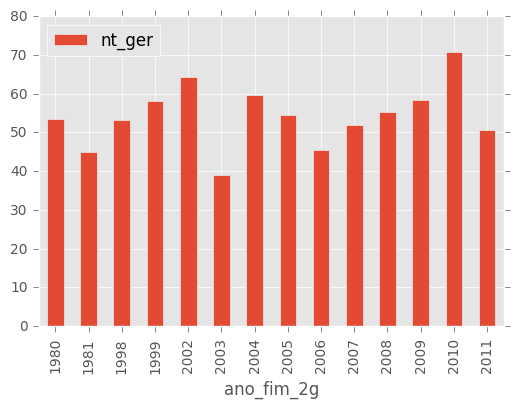

In [69]:
%matplotlib inline
df3 = df2.groupby('ano_fim_2g').mean()
df3.plot.bar() 

Para ter uma ideia dos tipos de visualização disponíveis, consulte: 
http://pandas.pydata.org/pandas-docs/version/0.9.0/visualization.html

Para uma visão geral (de 10 minutos) sobre o que você pode fazer com a biblioteca "Pandas", consulte: http://pandas.pydata.org/pandas-docs/stable/10min.html

Se tiver dúvidas sobre Python, consulte o bloco de notas sobre Python básico disponibilizado pelo professor, no Moodle.

Os exemplos anteriores foram realizados em cima de um subconjunto dos dados. 
Se você trocar o nome do arquivo para 'microdados_enade_2014.csv', no mesmo local onde o professor disponibilizou o arquivo '2014.csv', terá acesso aos dados (e atributos) completos do ano de 2014.

Como exercício, procure criar um código que junta tudo até agora, mas usando este arquivo mais completo: (i) colete os dados; (ii) coloque-os em memória; (iii) agrupe as notas gerais por ano, mostre informações estatísticas e monte um gráfico similar ao anterior. 

Desafio: ao invés de usar os dados fornecidos pelo professor, pegue os dados originais diretamente do portal de dados abertos do governo (ver URL no início deste notebook), via Python... Mas eles estão compactados (formato zip). Tente fazer isso e colete dados de outros anos!